In [97]:
import pandas as pd, numpy as np, re, os

## Evaluator is a home-made class for load results and elaborating them
from evaluation import Evaluator, compilerPatterns, ResultsFromMeanStdDF
from matplotlib import pyplot as plt
plt.rcParams.update({'font.size': 12})

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
def plotLossOnAx(ax, lossDF, label, **kwargs):
   stdKwargs = dict(alpha=0.2, edgecolor='#1B2ACC', facecolor='#089FFF',
                            linewidth=4, antialiased=True)
   stdKwargs.update(kwargs)
   ax.plot(lossDF['mean'], label = label )
   ax.fill_between(lossDF.index, lossDF['mean']-lossDF['std'], 
                  lossDF['mean']+lossDF['std'], **stdKwargs)

In [4]:
## looking for moses directory experiments only
paths = [ os.path.join(dataset.name, experiment.name) 
         for dataset in os.scandir('experiments') if dataset.is_dir() and 'moses_' in dataset.name
         for experiment in os.scandir(dataset.path)  if 'hl' in experiment.name
           ]

In [5]:
paths

['moses_SELFIES-RNN/2hl_512hu_256bs_0.001lr',
 'moses_SELFIES-RNN/2hl_512hu_512bs_0.001lr',
 'moses_SELFIES-RNN/2hl_256hu_256bs_0.001lr',
 'moses_SELFIES-RNN/2hl_256hu_512bs_0.001lr',
 'moses_SELFIES-RNN/3hl_256hu_256bs_0.001lr',
 'moses_SELFIES-RNN/3hl_256hu_512bs_0.001lr',
 'moses_SELFIES-RNN/3hl_512hu_256bs_0.001lr',
 'moses_SELFIES-RNN/3hl_512hu_512bs_0.001lr',
 'moses_SMILES-RNN/2hl_512hu_256bs_0.001lr',
 'moses_SMILES-RNN/2hl_512hu_512bs_0.001lr',
 'moses_SMILES-RNN/2hl_256hu_256bs_0.001lr',
 'moses_SMILES-RNN/2hl_256hu_512bs_0.001lr',
 'moses_SMILES-RNN/3hl_256hu_256bs_0.001lr',
 'moses_SMILES-RNN/3hl_256hu_512bs_0.001lr',
 'moses_SMILES-RNN/3hl_512hu_256bs_0.001lr',
 'moses_SMILES-RNN/3hl_512hu_512bs_0.001lr',
 'moses_fragSMILES-RNN/2hl_512hu_256bs_300es_0.001lr',
 'moses_fragSMILES-RNN/2hl_512hu_512bs_300es_0.001lr',
 'moses_fragSMILES-RNN/2hl_256hu_256bs_300es_0.001lr',
 'moses_fragSMILES-RNN/2hl_256hu_512bs_300es_0.001lr',
 'moses_fragSMILES-RNN/3hl_256hu_256bs_300es_0.001lr

In [92]:
evaluators = [Evaluator(path) for path in paths]

/home/tox/DeNovo/evaluation.py:251: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  
/home/tox/DeNovo/evaluation.py:251: DtypeWarning: Columns (37,38) have mixed types. Specify dtype option on import or set low_memory=False.
  
/home/tox/DeNovo/evaluation.py:251: DtypeWarning: Columns (37,38,39,40,41) have mixed types. Specify dtype option on import or set low_memory=False.
  
/home/tox/DeNovo/evaluation.py:251: DtypeWarning: Columns (38,39,40,41) have mixed types. Specify dtype option on import or set low_memory=False.
  
/home/tox/DeNovo/evaluation.py:251: DtypeWarning: Columns (35,36,37) have mixed types. Specify dtype option on import or set low_memory=False.
  
/home/tox/DeNovo/evaluation.py:251: DtypeWarning: Columns (36,37,38) have mixed types. Specify dtype option on import or set low_memory=False.
  
/home/tox/DeNovo/evaluation.py:251: DtypeWarning: Columns (37,38,39,40) have mixed types. Specify dtype option on import or 

## Syntax metrics - Validity, Uniqueness and Novelty

In [93]:
genDFs=pd.concat( [evaluator.getResultsGens() for evaluator in evaluators if not evaluator.gens.empty], ignore_index=True )

In [94]:
genDFs['valid%']=genDFs['valid']/genDFs['amount']
genDFs['unique%']=genDFs['unique']/genDFs['valid']
genDFs['novel%']=genDFs['novel']/genDFs['unique']

In [144]:
genGrp=genDFs.fillna(-1).groupby(compilerPatterns.index.drop(['fold','aug']).tolist(),as_index=True, dropna=False)

/tmp/ipykernel_968745/1101016041.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  genGrp=genDFs.fillna(-1).groupby(compilerPatterns.index.drop(['fold','aug']).tolist(),as_index=True, dropna=False)


In [149]:
genStats=genGrp.describe().loc(axis=1)[ ( slice(None),['mean','std'] ) ].drop(columns=['fold','aug']).query('amount == 6000')

In [150]:
genStats=ResultsFromMeanStdDF(genStats)

In [151]:
genStats.query(' hl==3 and hu==256 and bs==512 ')

valid  \
dataset notation   hl hu  es   lr    bs  amount epoch T                    
moses   SELFIES    3  256 -1   0.001 512 6000   4     1.0   6000.0 ± 0.0   
        SMILES     3  256 -1   0.001 512 6000   4     1.0  5790.0 ± 20.0   
        fragSMILES 3  256  300 0.001 512 6000   4     1.0  5820.0 ± 20.0   

                                                                  unique  \
dataset notation   hl hu  es   lr    bs  amount epoch T                    
moses   SELFIES    3  256 -1   0.001 512 6000   4     1.0   5999.0 ± 1.0   
        SMILES     3  256 -1   0.001 512 6000   4     1.0  5790.0 ± 20.0   
        fragSMILES 3  256  300 0.001 512 6000   4     1.0  5820.0 ± 20.0   

                                                                   novel  \
dataset notation   hl hu  es   lr    bs  amount epoch T                    
moses   SELFIES    3  256 -1   0.001 512 6000   4     1.0  5550.0 ± 50.0   
        SMILES     3  256 -1   0.001 512 6000   4     1.0  5270.0 ± 40.0   
        fragSMILES 3  256  300 0.001 512 6000   4     1.0  5170.0 ± 20.0   

                                                                  valid%  \
dataset notation   hl hu  es   lr    bs  amount epoch T                    
moses   SELFIES    3  256 -1   0.001 512 6000   4     1.0      1.0 ± 0.0   
        SMILES     3  256 -1   0.001 512 6000   4     1.0  0.965 ± 0.003   
        fragSMILES 3  256  300 0.001 512 6000   4     1.0   0.97 ± 0.003   

                                                                   unique%  \
dataset notation   hl hu  es   lr    bs  amount epoch T                      
moses   SELFIES    3  256 -1   0.001 512 6000   4     1.0  0.9999 ± 0.0002   
        SMILES     3  256 -1   0.001 512 6000   4     1.0  0.9997 ± 0.0002   
        fragSMILES 3  256  300 0.001 512 6000   4     1.0  0.9992 ± 0.0003   

                                                                  novel%  
dataset notation   hl hu  es   lr    bs  amount epoch T                   
moses   SELFIES    3  256 -1   0.001 512 6000   4     1.0  0.926 ± 0.008  
        SMILES     3  256 -1   0.001 512 6000   4     1.0   0.91 ± 0.008  
        fragSMILES 3  256  300 0.001 512 6000   4     1.0  0.889 ± 0.004

In [ ]:
params=[3,256,-1,0.001,512,6000,4,1.0]
paramsFrag = [3,256,300,0.001,512,6000,4,1.0]

In [155]:
genStats.to_csv('results/06_mosesSyntax.csv')

In [ ]:
from scipy import stats

In [152]:
genPvals = pd.DataFrame.from_dict(
                {notation: 
                {metric:stats.ttest_ind(
                genGrp.get_group(('moses',notation,*params))[metric],
                genGrp.get_group(('moses','fragSMILES',*paramsFrag))[metric],
                ).pvalue for metric in genStats.columns} for notation in ['SMILES','SELFIES']
                }, orient='index'
            )

/usr/lib/python3/dist-packages/scipy/stats/_axis_nan_policy.py:523: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


In [157]:
genPvals

,valid,unique,novel,valid%,unique%,novel%
SMILES,3.024756e-02,4.645946e-02,1.053285e-03,3.024756e-02,0.041162,0.000563
SELFIES,1.045067e-08,1.091405e-08,2.583064e-07,1.045067e-08,0.003508,0.000016


In [158]:
genPvals.map(lambda x: x<0.05)

,valid,unique,novel,valid%,unique%,novel%
SMILES,True,True,True,True,True,True
SELFIES,True,True,True,True,True,True


## Losses

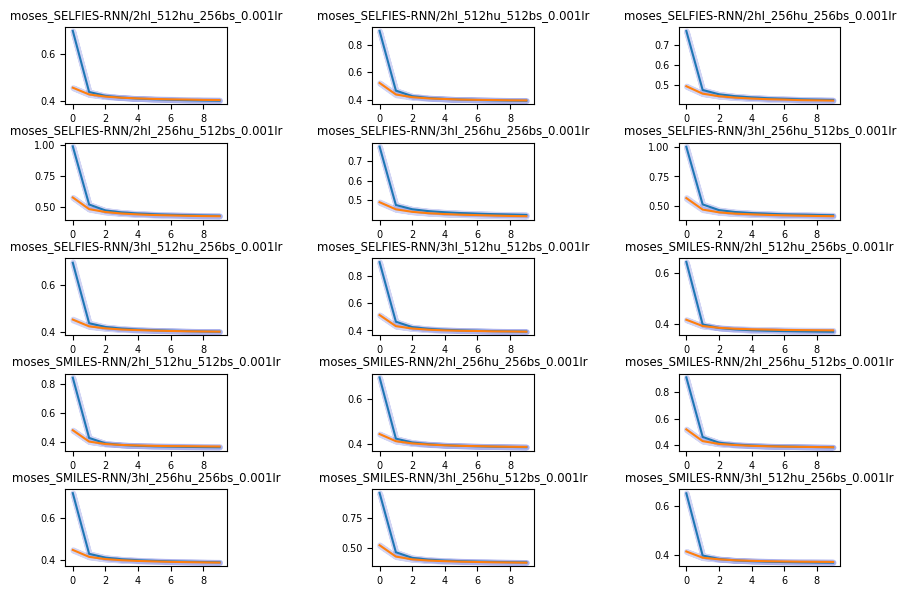

In [14]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 7})

fig,axes = plt.subplots(nrows=5, ncols=3, figsize=(10,7),gridspec_kw={'wspace':0.9, 'hspace':0.5})
for path, evaluator, ax in zip(paths, evaluators, axes.flatten()):
    train,test = evaluator.getTrainTestLosses()
    plotLossOnAx(ax, train, label='Training')
    plotLossOnAx(ax, test, label='Validation')
    ax.set_title(path)

## Metrics of Novels

In [119]:
novels = pd.concat( [evaluator.getResultsNovels() for evaluator in evaluators], ignore_index=True)
novels.drop(columns='aug',inplace=True)

In [120]:
novGrp=novels.fillna(-1).groupby(compilerPatterns.index.drop(['fold','aug']).tolist(), as_index=True, dropna=False)

/tmp/ipykernel_968745/2893679507.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  novGrp=novels.fillna(-1).groupby(compilerPatterns.index.drop(['fold','aug']).tolist(), as_index=True, dropna=False)


In [121]:
metrics = [metric for metric in novels.columns if metric not in compilerPatterns.index]

In [127]:
novStats=novGrp.describe().loc(axis=1)[ ( slice(None),['mean','std'] ) ].drop(columns='fold').query('amount==6000')

In [128]:
novStats = ResultsFromMeanStdDF(novStats)

In [129]:
novStats.query(' hl==3 and hu==256 and bs==512 ')

FCD/Test  \
dataset notation   hl hu  es   lr    bs  amount epoch T                  
moses   SELFIES    3  256 -1   0.001 512 6000   4     1.0   1.0 ± 0.06   
        SMILES     3  256 -1   0.001 512 6000   4     1.0  0.39 ± 0.03   
        fragSMILES 3  256  300 0.001 512 6000   4     1.0  0.33 ± 0.02   

                                                                SNN/Test  \
dataset notation   hl hu  es   lr    bs  amount epoch T                    
moses   SELFIES    3  256 -1   0.001 512 6000   4     1.0  0.535 ± 0.002   
        SMILES     3  256 -1   0.001 512 6000   4     1.0   0.56 ± 0.003   
        fragSMILES 3  256  300 0.001 512 6000   4     1.0  0.575 ± 0.004   

                                                             Scaf/Test  \
dataset notation   hl hu  es   lr    bs  amount epoch T                  
moses   SELFIES    3  256 -1   0.001 512 6000   4     1.0   0.7 ± 0.05   
        SMILES     3  256 -1   0.001 512 6000   4     1.0  0.69 ± 0.04   
        fragSMILES 3  256  300 0.001 512 6000   4     1.0  0.71 ± 0.04   

                                                                    IntDiv  \
dataset notation   hl hu  es   lr    bs  amount epoch T                      
moses   SELFIES    3  256 -1   0.001 512 6000   4     1.0     0.86 ± 0.001   
        SMILES     3  256 -1   0.001 512 6000   4     1.0  0.8575 ± 0.0008   
        fragSMILES 3  256  300 0.001 512 6000   4     1.0   0.8567 ± 0.001   

                                                                   IntDiv2  \
dataset notation   hl hu  es   lr    bs  amount epoch T                      
moses   SELFIES    3  256 -1   0.001 512 6000   4     1.0    0.854 ± 0.001   
        SMILES     3  256 -1   0.001 512 6000   4     1.0  0.8514 ± 0.0008   
        fragSMILES 3  256  300 0.001 512 6000   4     1.0     0.85 ± 0.001   

                                                                 Filters  \
dataset notation   hl hu  es   lr    bs  amount epoch T                    
moses   SELFIES    3  256 -1   0.001 512 6000   4     1.0  0.925 ± 0.009   
        SMILES     3  256 -1   0.001 512 6000   4     1.0  0.989 ± 0.002   
        fragSMILES 3  256  300 0.001 512 6000   4     1.0  0.991 ± 0.001   

                                                                  logP  \
dataset notation   hl hu  es   lr    bs  amount epoch T                  
moses   SELFIES    3  256 -1   0.001 512 6000   4     1.0  0.17 ± 0.07   
        SMILES     3  256 -1   0.001 512 6000   4     1.0  0.12 ± 0.03   
        fragSMILES 3  256  300 0.001 512 6000   4     1.0  0.07 ± 0.02   

                                                                      SA  \
dataset notation   hl hu  es   lr    bs  amount epoch T                    
moses   SELFIES    3  256 -1   0.001 512 6000   4     1.0  0.219 ± 0.009   
        SMILES     3  256 -1   0.001 512 6000   4     1.0    0.07 ± 0.02   
        fragSMILES 3  256  300 0.001 512 6000   4     1.0    0.05 ± 0.02   

                                                                     QED  \
dataset notation   hl hu  es   lr    bs  amount epoch T                    
moses   SELFIES    3  256 -1   0.001 512 6000   4     1.0  0.025 ± 0.004   
        SMILES     3  256 -1   0.001 512 6000   4     1.0   0.01 ± 0.004   
        fragSMILES 3  256  300 0.001 512 6000   4     1.0  0.008 ± 0.004   

                                                              weight  
dataset notation   hl hu  es   lr    bs  amount epoch T               
moses   SELFIES    3  256 -1   0.001 512 6000   4     1.0  4.2 ± 0.9  
        SMILES     3  256 -1   0.001 512 6000   4     1.0  6.0 ± 2.0  
        fragSMILES 3  256  300 0.001 512 6000   4     1.0  3.9 ± 0.3

In [130]:
novStats.to_csv('results/06_mosesNovelMetrics.csv')

In [131]:
novPvals = pd.DataFrame.from_dict(
                {notation: 
                {metric:stats.ttest_ind(
                novGrp.get_group(('moses',notation,*params))[metric],
                novGrp.get_group(('moses','fragSMILES',*paramsFrag))[metric],
                ).pvalue for metric in metrics} for notation in ['SMILES','SELFIES']
                }, orient='index'
            )

In [132]:
novPvals

,FCD/Test,SNN/Test,Scaf/Test,IntDiv,IntDiv2,Filters,logP,SA,QED,weight
SMILES,9.082510e-03,1.218708e-04,0.266493,0.162355,0.134453,4.383837e-02,0.009481,8.413870e-02,0.472570,0.079457
SELFIES,1.610516e-08,2.550003e-08,0.560384,0.002637,0.001663,1.883966e-07,0.015321,1.589970e-07,0.000174,0.511046
